In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/mta-customer-feedback-data-beginning-2014-1.csv'
data = pd.read_csv(file_path)

**How many unique values are there in the 'Commendation or Complaint' column?**

In [17]:
unique_values = data['Commendation or Complaint'].nunique()
print(f"Number of unique values in 'Commendation or Complaint' column: {unique_values}")


Number of unique values in 'Commendation or Complaint' column: 2


**What are the unique values in the 'Subject Matter' column?**

In [18]:
unique_subject_matter = data['Subject Matter'].unique()
print(f"Unique values in 'Subject Matter' column: {unique_subject_matter}")


Unique values in 'Subject Matter' column: ['Employees' 'Policies, Rules & Regulations' 'Schedules / Reservations'
 'Buses' 'Station /Bus Stop /Facility /Structure'
 'Telephone / Website / Mobile Apps' 'Trains'
 'Travel Disruption / Trip Problem' 'Customer'
 'MetroCard/Tickets/E-Zpass & Tolls' 'MTA Agency Cars / Trucks'
 'Public Hearing' 'Commendation' 'Complaint'
 'Ferry Service - Hudson River' 'Reasonable Modification'
 'Construction / Capital Projects']


**How many missing values are there in the 'Issue Detail' column?**

In [19]:
missing_values_issue_detail = data['Issue Detail'].isnull().sum()
print(f"Number of missing values in 'Issue Detail' column: {missing_values_issue_detail}")


Number of missing values in 'Issue Detail' column: 10134


**Apply Linear Discriminant Analysis (LDA) for dimensionality reduction.**

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Assuming you have features in X and labels in y
X = data.drop(['Commendation or Complaint'], axis=1)  # Replace with actual features
y = data['Commendation or Complaint']  # Replace with actual labels

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

# Convert sparse matrix to dense array
X = X.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


**Visualize the LDA-transformed data.**

<ipython-input-21-45d49c7f7f85>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_lda, y_train, cmap='viridis', edgecolor='k', s=50)


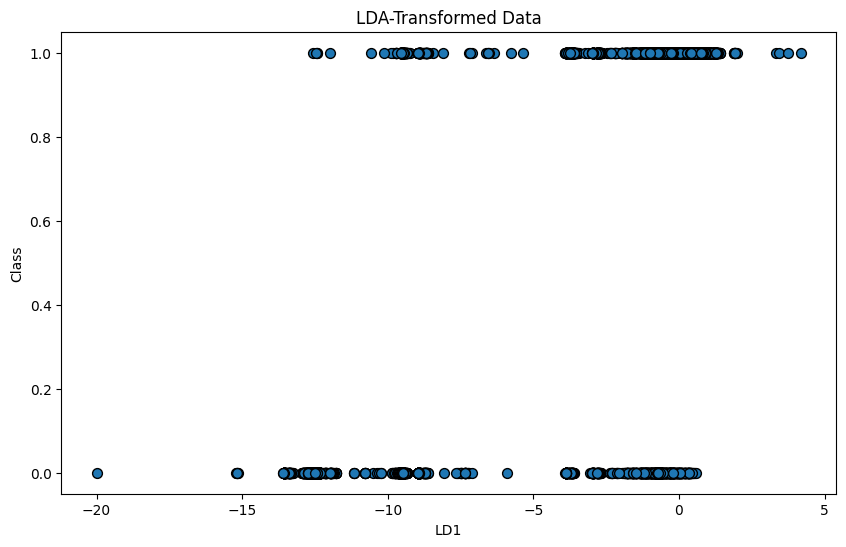

In [21]:
# Assuming you have one class in 'Commendation or Complaint' (binary classification)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda, y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA-Transformed Data')
plt.xlabel('LD1')
plt.ylabel('Class')
plt.show()


**Display the coefficients of each feature after LDA.**

In [22]:
import pandas as pd

# Assuming X is a NumPy array, convert it to a DataFrame
X_df = pd.DataFrame(X)

feature_importances = lda.coef_[0]
feature_names = X_df.columns
feature_coefficients = dict(zip(feature_names, feature_importances))

print("Feature Coefficients after LDA:")
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient}")


Feature Coefficients after LDA:
0: -0.09513205009356329
1: -1.0877128374312184
2: 1.0628707862382647
3: -0.8819154781272445
4: 6.267843648208544
5: -98.5519866109801
6: 24.095887766937754
7: 22.222980509092892
8: 21.770127244702138
9: -22.290782863022077
10: 20.915562047251715
11: 16.32752435059595
12: 11.772972941028323
13: 9.662637285859962
14: -6.36311952837783
15: 22.27673338093964
16: -0.05225962277004287
17: 9.345105908351853
18: 14.523660221141666
19: 6.062233188345475
20: 12.457239344456907
21: -7.87572042289478
22: 22.823235293263387
23: -12.370818602773767
24: 4.450745926042804
25: -7.259358890086971
26: 37.129231016013094
27: 31.51370699377766
28: 28.134973549573733
29: -11.643338622318417
30: 4.53095882181244
31: 3.7703791556340005
32: -7.555669427812328
33: 2.994506049098765
34: -9.192829188367053
35: 4.72755173341814
36: -9.928953321709027
37: 26.07856255679722
38: 17.01633329691109
39: -9.050031714539985
40: -32.22133456718146
41: 8.31329927120233
42: 15.28698319740084
4

**Evaluate the performance of the model after LDA.**

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Assuming you have X and y for training and X_test_lda and y_test for testing
# Replace this with your actual data
X_train, X_test_lda, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have trained an LDA classifier
lda = LinearDiscriminantAnalysis()
clf = lda.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = clf.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Accuracy: 0.989966827994997
Confusion Matrix:
[[ 1170   326]
 [   43 35239]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1496
           1       0.99      1.00      0.99     35282

    accuracy                           0.99     36778
   macro avg       0.98      0.89      0.93     36778
weighted avg       0.99      0.99      0.99     36778



**Visualize the Separation of Classes after LDA Transformation**

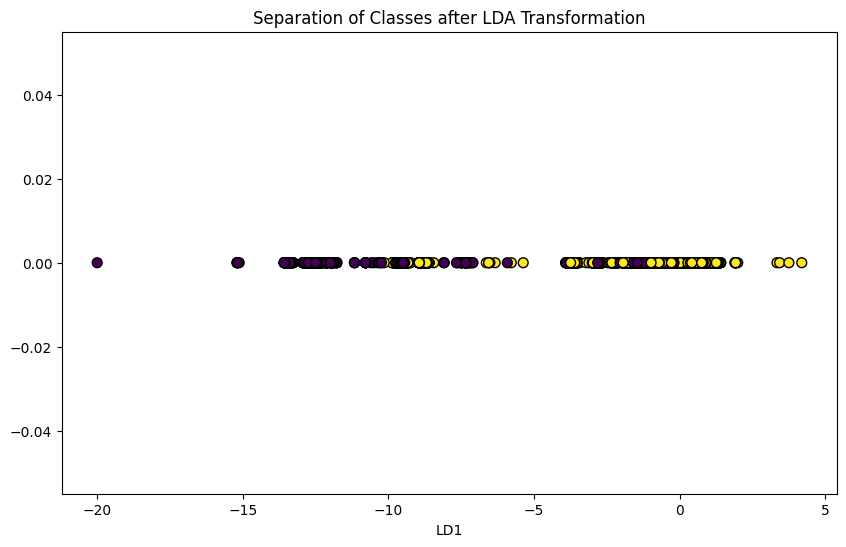

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
# Assuming you have X_train and y_train
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)

# Assuming you have two classes in 'Commendation or Complaint' (binary classification)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Separation of Classes after LDA Transformation')
plt.xlabel('LD1')
plt.show()



**Visualize Class Separation with Decision Boundaries**

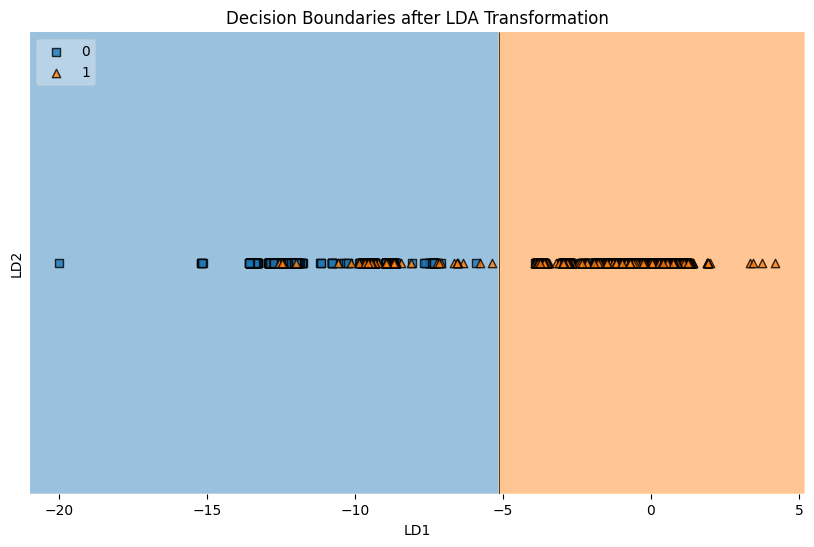

In [31]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Assuming binary classification and a trained classifier (clf)

# Fit the classifier on the 2D LDA-transformed data
lda_2d = LinearDiscriminantAnalysis(n_components=min(2, X_train.shape[1], len(np.unique(y_train)) - 1))
X_train_lda_2d = lda_2d.fit_transform(X_train, y_train)
clf.fit(X_train_lda_2d, y_train)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_lda_2d, y_train, clf=clf, legend=2)
plt.title('Decision Boundaries after LDA Transformation')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()



**Visualize Feature Coefficients**

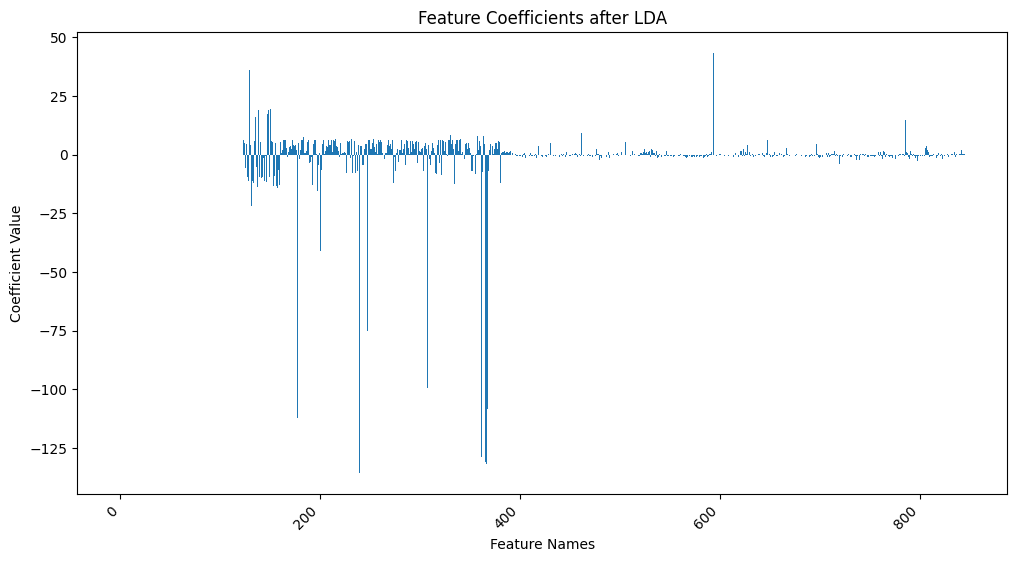

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances)
plt.title('Feature Coefficients after LDA')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()


**Visualizing Confusion Matrix**

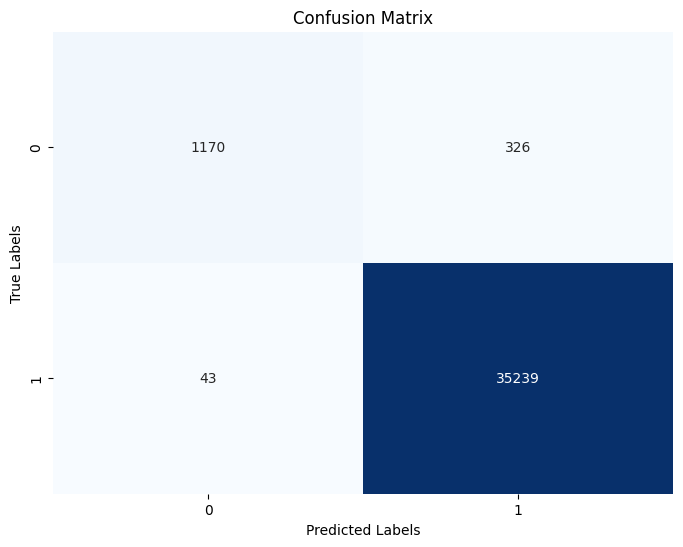

In [35]:
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Explore the Distribution of 'Commendation or Complaint' Classes**

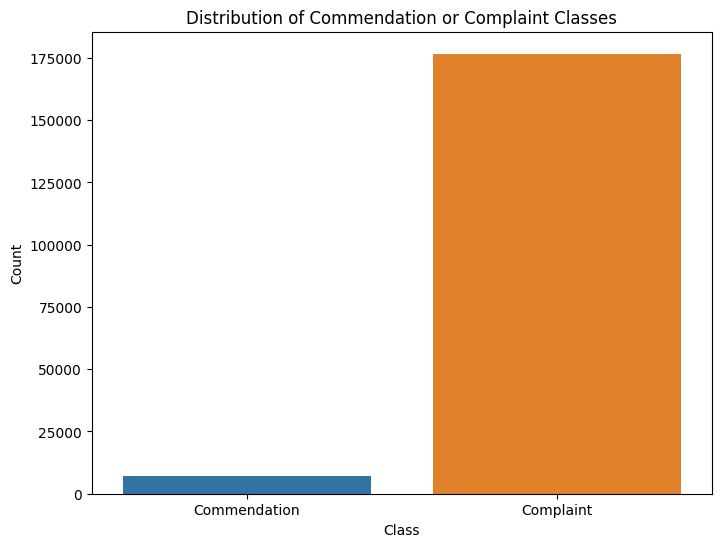

In [36]:
# Assuming 'Commendation or Complaint' is the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Commendation or Complaint', data=data)
plt.title('Distribution of Commendation or Complaint Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**How is the distribution of customer feedback across different years?**

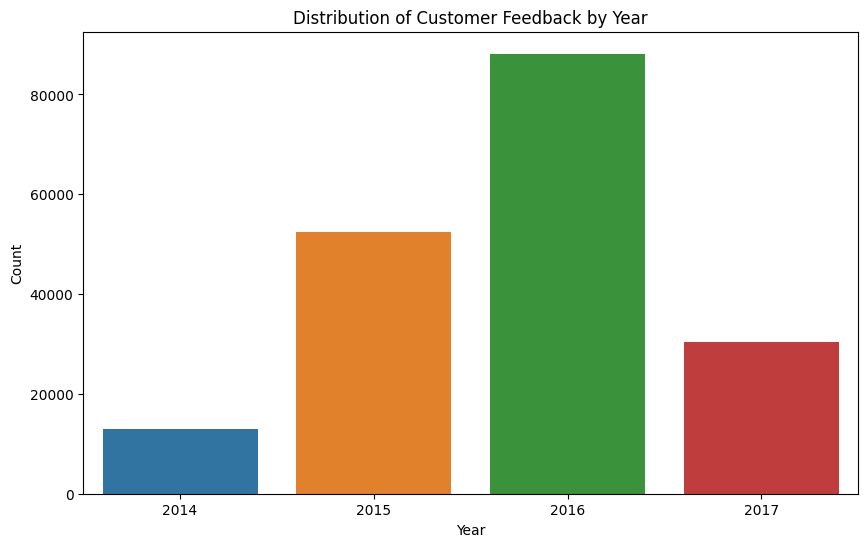

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data)
plt.title('Distribution of Customer Feedback by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


**What are the most common subject matters mentioned in customer feedback?**

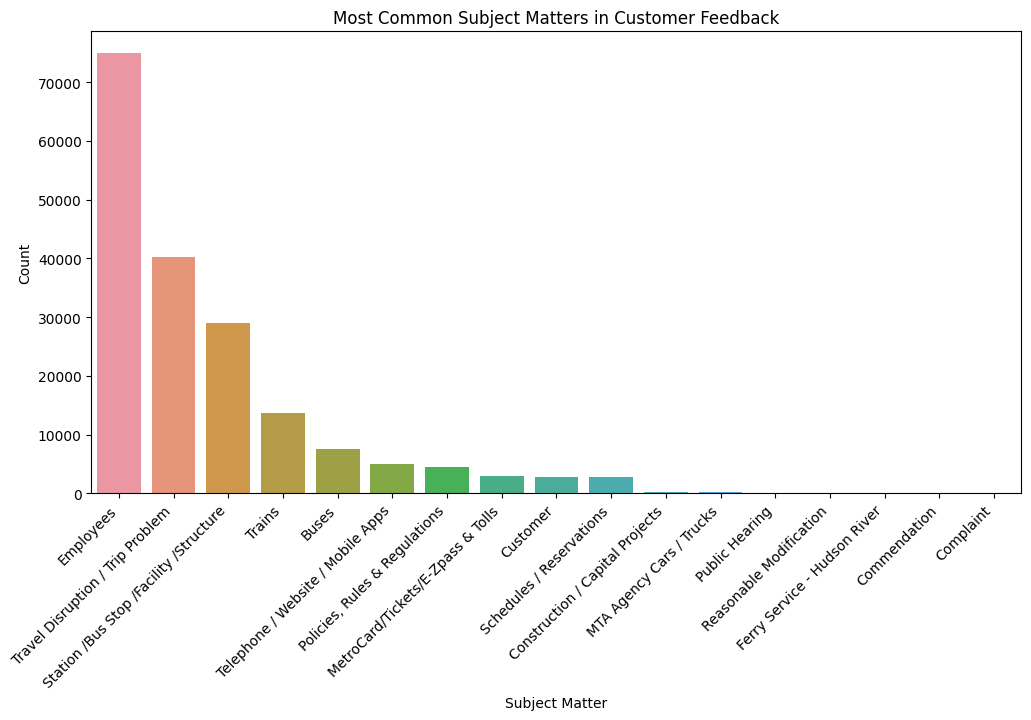

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject Matter', data=data, order=data['Subject Matter'].value_counts().index)
plt.title('Most Common Subject Matters in Customer Feedback')
plt.xlabel('Subject Matter')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**How do quarterly trends in customer feedback vary across different years?**

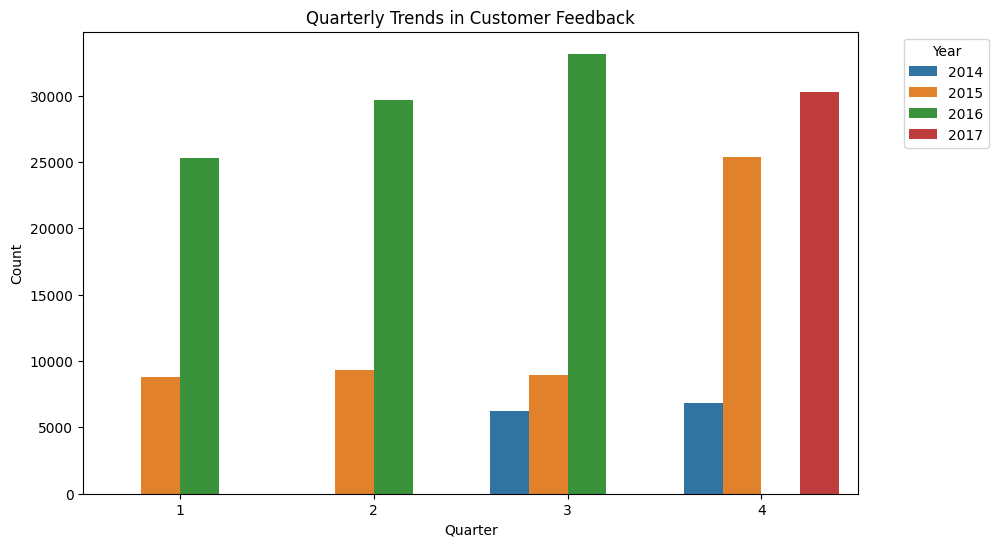

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter', data=data, hue='Year')
plt.title('Quarterly Trends in Customer Feedback')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**How does the distribution of 'Subject Detail' vary for commendations and complaints?**

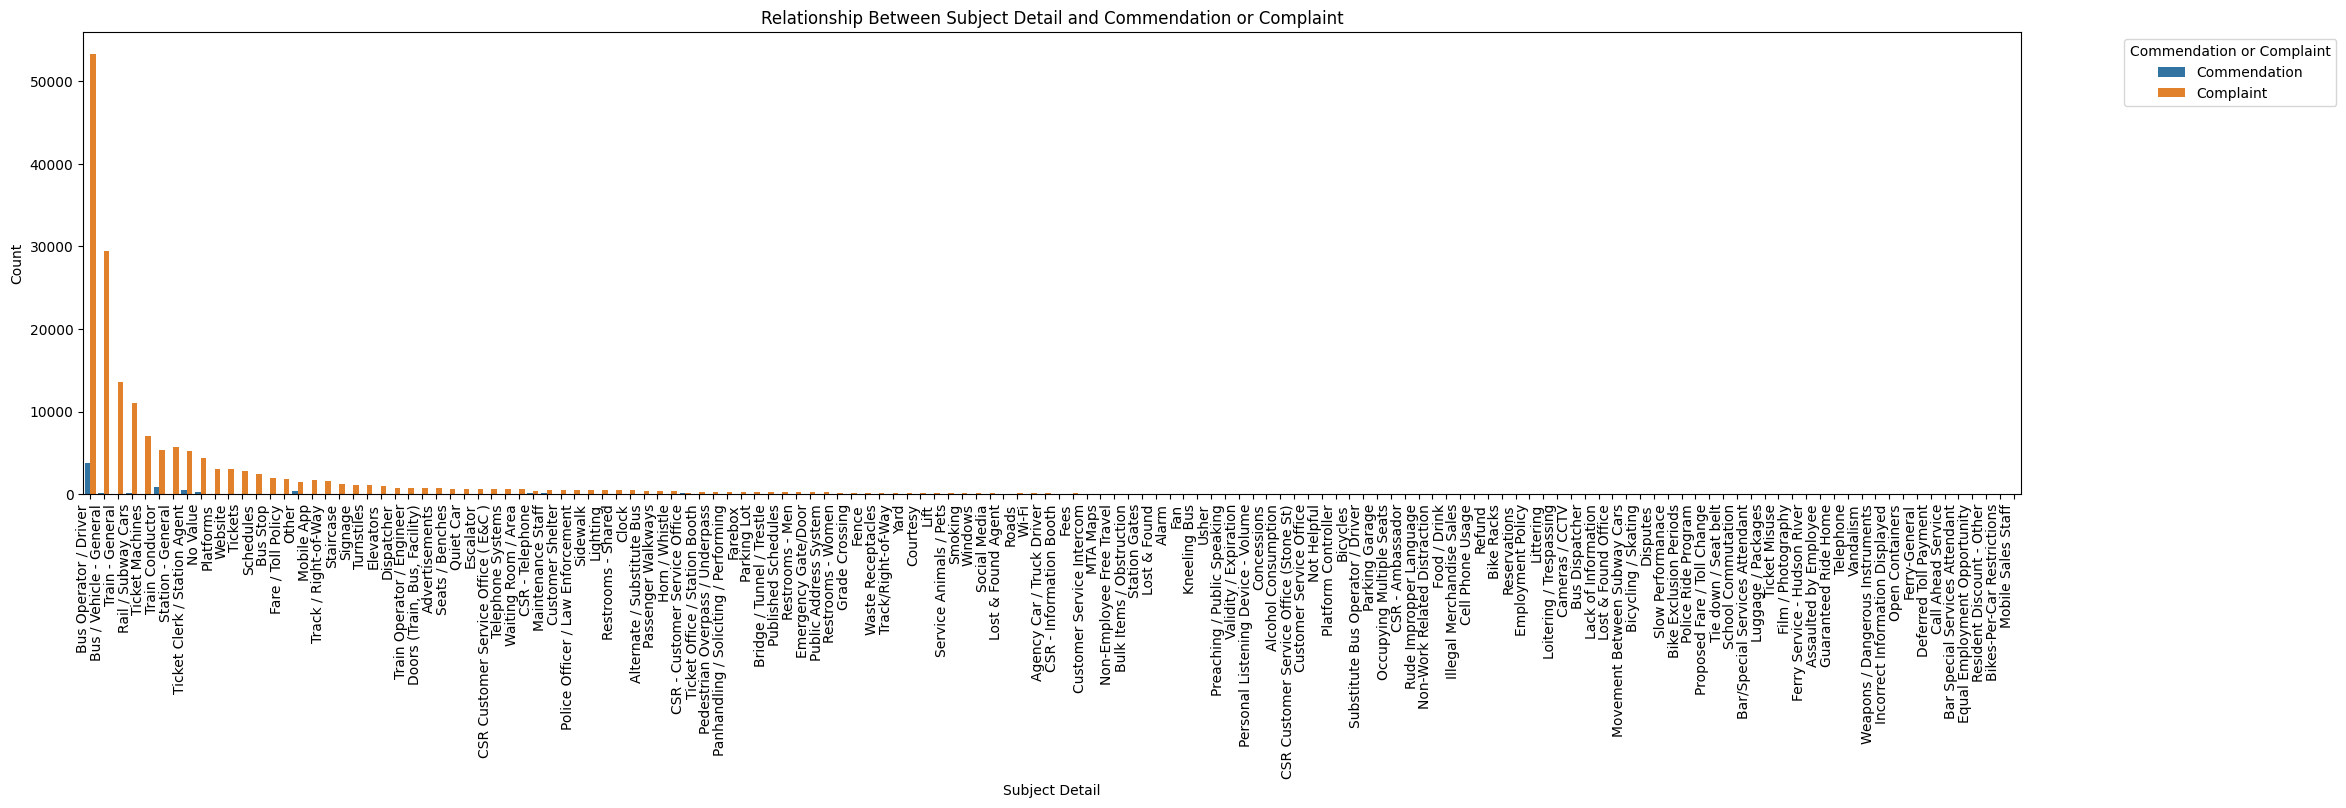

In [42]:
plt.figure(figsize=(25, 6))
sns.countplot(x='Subject Detail', data=data, hue='Commendation or Complaint', order=data['Subject Detail'].value_counts().index)
plt.title('Relationship Between Subject Detail and Commendation or Complaint')
plt.xlabel('Subject Detail')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Commendation or Complaint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**How does the frequency of commendations and complaints change over different quarters?**

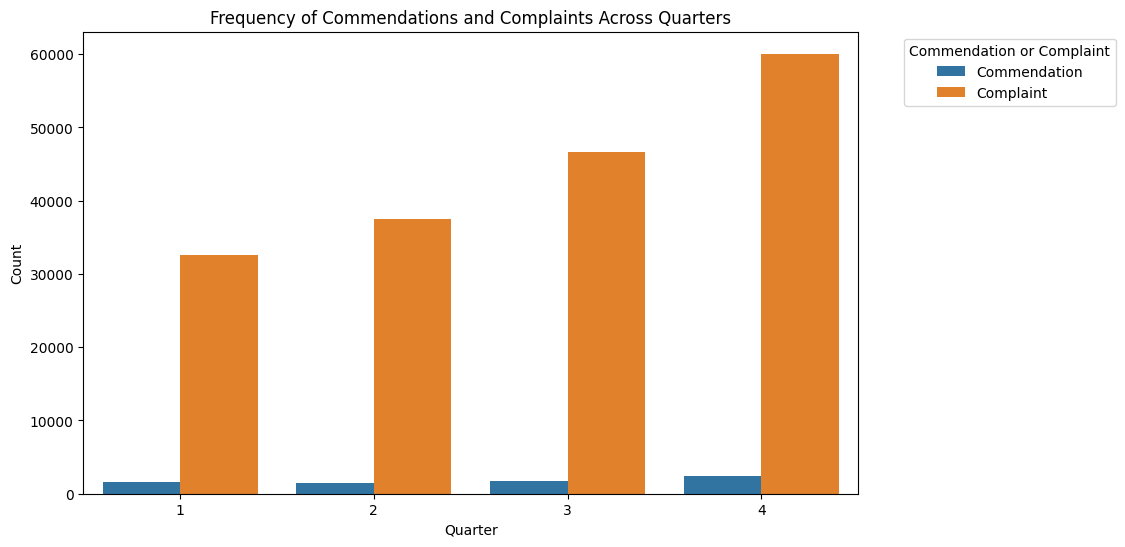

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter', data=data, hue='Commendation or Complaint')
plt.title('Frequency of Commendations and Complaints Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title='Commendation or Complaint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**What is the distribution of customer feedback subject matters within each year?**

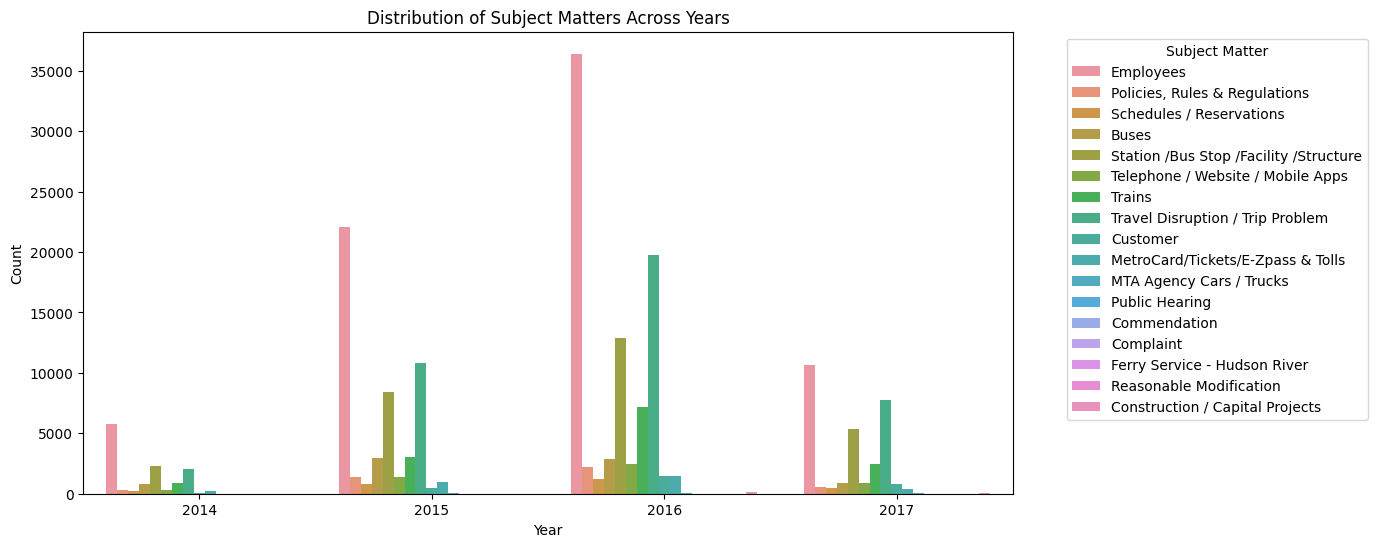

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data, hue='Subject Matter')
plt.title('Distribution of Subject Matters Across Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Subject Matter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Are there any noticeable trends in customer feedback across different agencies?**

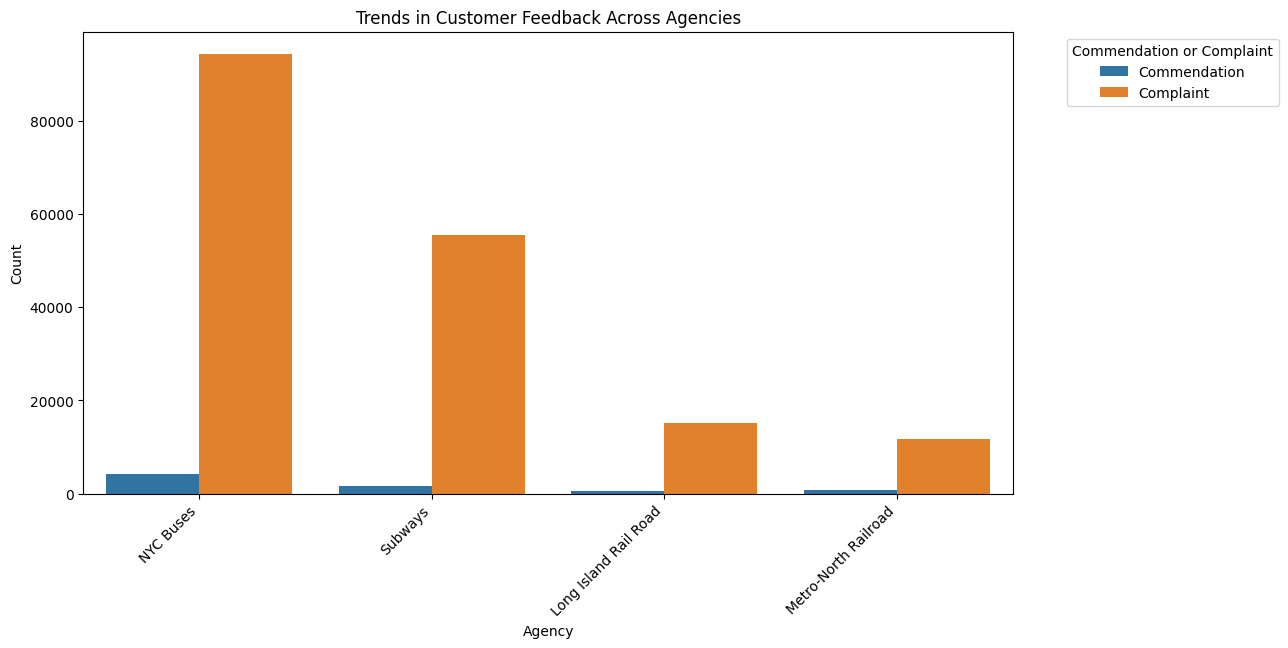

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Agency', data=data, hue='Commendation or Complaint', order=data['Agency'].value_counts().index)
plt.title('Trends in Customer Feedback Across Agencies')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Commendation or Complaint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**How does the distribution of customer feedback vary for different 'Subject Matter' within each quarter?**

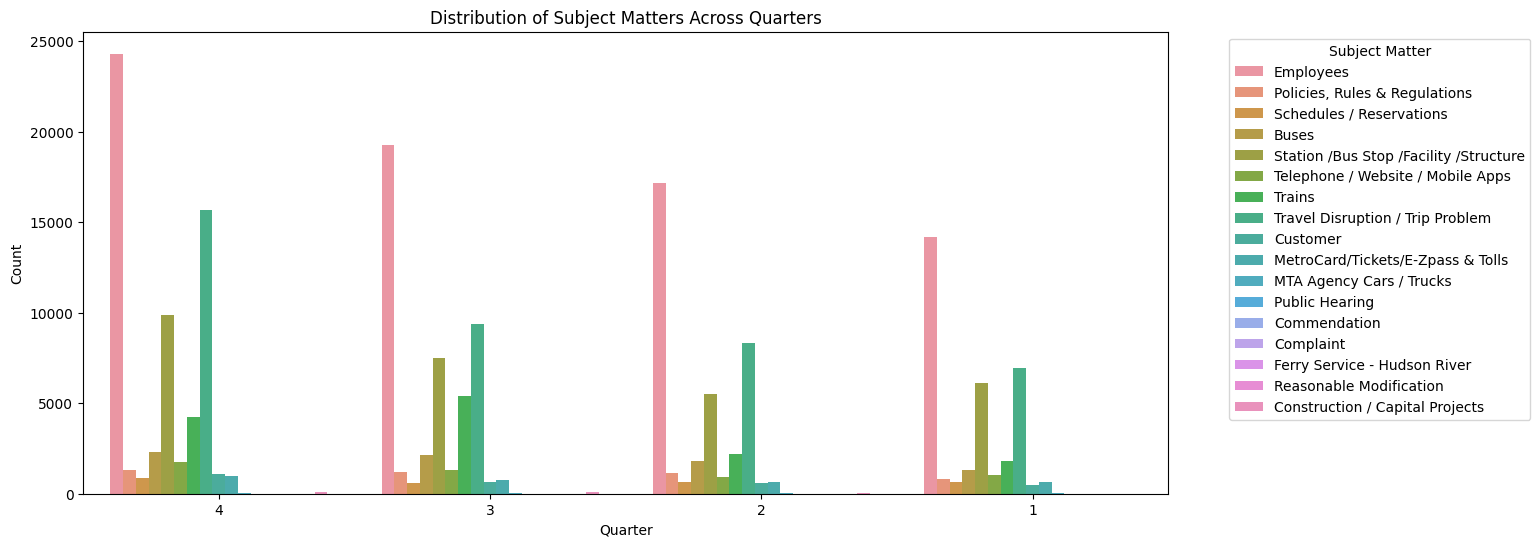

In [48]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Quarter', data=data, hue='Subject Matter', order=data['Quarter'].value_counts().index)
plt.title('Distribution of Subject Matters Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title='Subject Matter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**How are the lengths of 'Subject Detail' and 'Issue Detail' related?**

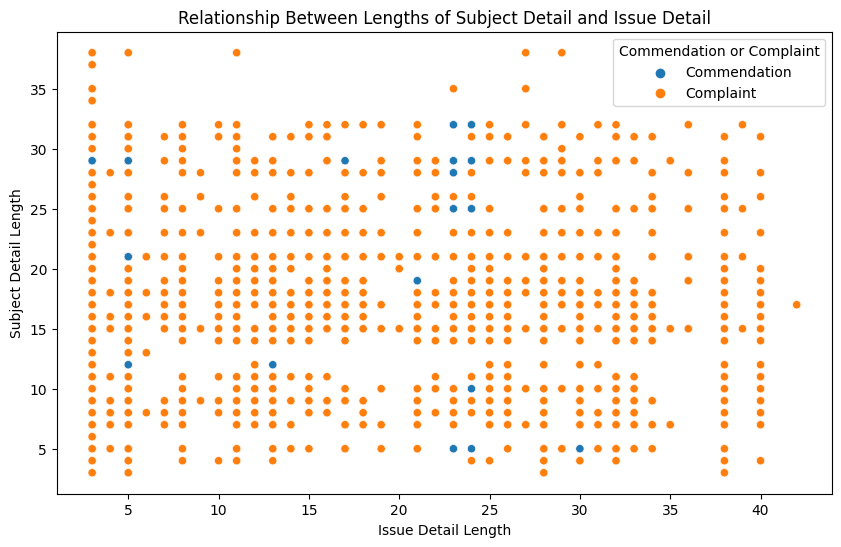

In [50]:
data['Subject Detail Length'] = data['Subject Detail'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Issue Detail Length', y='Subject Detail Length', data=data, hue='Commendation or Complaint')
plt.title('Relationship Between Lengths of Subject Detail and Issue Detail')
plt.xlabel('Issue Detail Length')
plt.ylabel('Subject Detail Length')
plt.show()


**How does the sentiment of customer feedback change over the years?**

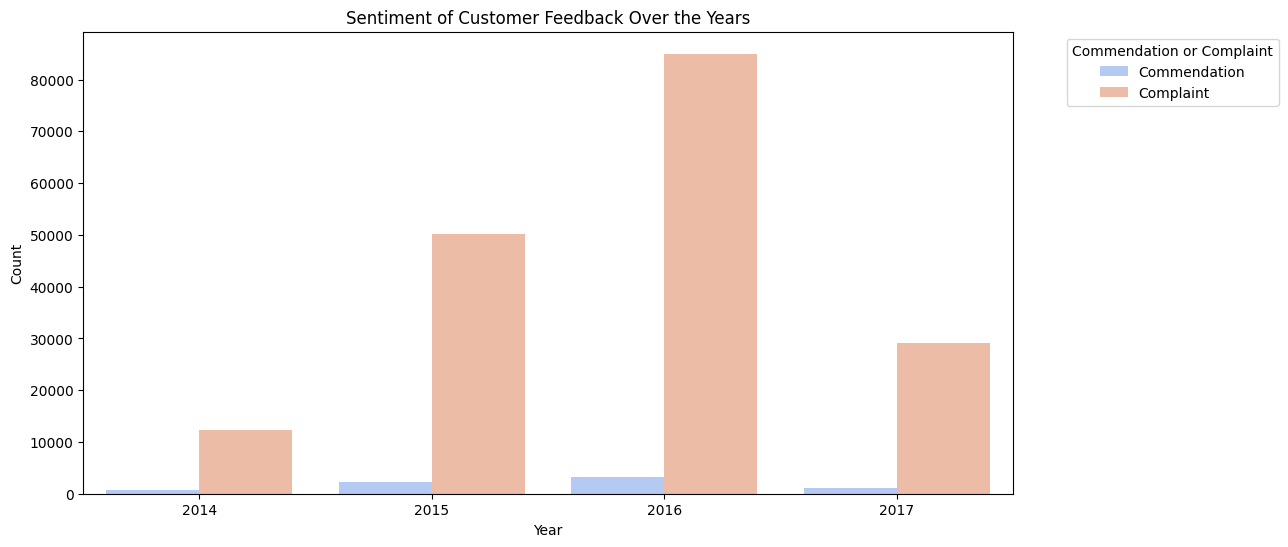

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data, hue='Commendation or Complaint', palette='coolwarm')
plt.title('Sentiment of Customer Feedback Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Commendation or Complaint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
